# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC

# Read the datasset

In [2]:
file = pd.read_csv('fish_dataset.csv')

x = file[['ph', 'temperature', 'turbidity']].values
y = file['fish'].values

# No of classes
print(np.unique(y, return_counts=True))

(array(['karpio', 'katla', 'koi', 'magur', 'pangas', 'prawn', 'rui',
       'shrimp', 'silverCup', 'sing', 'tilapia'], dtype=object), array([2112, 3786,  964,  704, 5314, 1348, 6336, 3204, 3906, 3776, 8830],
      dtype=int64))


Encode the class into numeric value

In [3]:
le = LabelEncoder()
file['fish_encoded'] = le.fit_transform(file['fish'])
print(file)

         ph  temperature  turbidity     fish  fish_encoded
0      6.00        27.00       4.00    katla             1
1      7.60        28.00       5.90     sing             9
2      7.80        27.00       5.50     sing             9
3      6.50        31.00       5.50    katla             1
4      8.20        27.00       8.50    prawn             5
...     ...          ...        ...      ...           ...
40275  6.99        21.19       3.56     sing             9
40276  6.87        21.00       3.56     sing             9
40277  6.68        21.19       3.58     sing             9
40278  6.95        21.12       3.58     sing             9
40279  6.50        21.00       5.00  tilapia            10

[40280 rows x 5 columns]


Compute the correlation matrix

                    ph  temperature  turbidity  fish_encoded
ph            1.000000    -0.139823  -0.033706     -0.039611
temperature  -0.139823     1.000000   0.286978     -0.141416
turbidity    -0.033706     0.286978   1.000000     -0.180150
fish_encoded -0.039611    -0.141416  -0.180150      1.000000


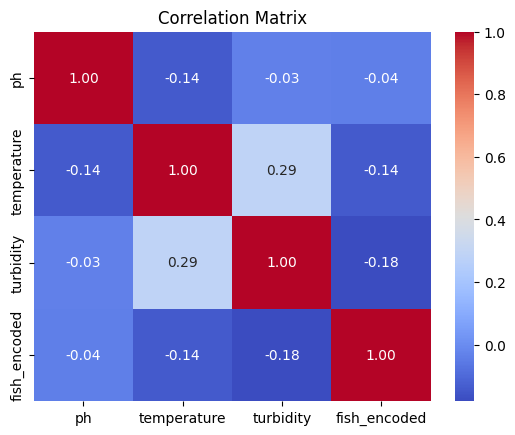

In [4]:
file_encoded = file[['ph', 'temperature', 'turbidity', 'fish_encoded']]

# Compute the correlation matrix
correlation_matrix = file_encoded.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Split dataset for train and test case

In [5]:
x_train, x_test, y_train, y_test = train_test_split(file.iloc[:, :3], file.iloc[:, -1], test_size=0.2, random_state=42)
print(y_train)

16657     9
23961    10
5561      4
14872     9
15421    10
         ..
6265     10
11284     8
38158     9
860       4
15795     2
Name: fish_encoded, Length: 32224, dtype: int32


Split x_train and y_train into new training and validation sets

In [6]:
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

# Scale the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_new)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Cross-Validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag'],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_new, y_train_new)
best_logistic_model = grid_search.best_estimator_

# Predictions on the smaller validation set
y_val_pred = best_logistic_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Predictions on the test set
y_pred = best_logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# KNN Classification

In [8]:

# Scale the training and validation sets
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new)
x_val_scaled = scaler.transform(x_val)

heighest_accuracy = heighest_neibhours = 0
for i in range(1, 50, 2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train_new_scaled, y_train_new)
    label_predict = knn_model.predict(x_val_scaled)
    accuracy = accuracy_score(y_val, label_predict)
    if heighest_accuracy < accuracy:
        heighest_accuracy = accuracy
        heighest_neibhours = i
    print("The accuracy for i = {} is {}".format(i, accuracy))
print("The highest accuracy is {} for the {} neighbors.".format(heighest_accuracy, heighest_neibhours))

# Compute accuracy for test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

best_knn_model = KNeighborsClassifier(heighest_neibhours)
best_knn_model.fit(x_train_scaled, y_train)
label_predict = best_knn_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, label_predict)
print("The accuracy for test data is {:.2f}%".format(accuracy*100))

The accuracy for i = 1 is 0.9986553578816715
The accuracy for i = 3 is 0.9986553578816715
The accuracy for i = 5 is 0.9986553578816715
The accuracy for i = 7 is 0.9988622258998758
The accuracy for i = 9 is 0.9986553578816715
The accuracy for i = 11 is 0.9986553578816715
The accuracy for i = 13 is 0.9988622258998758
The accuracy for i = 15 is 0.9986553578816715
The accuracy for i = 17 is 0.9988622258998758
The accuracy for i = 19 is 0.9986553578816715
The accuracy for i = 21 is 0.9986553578816715
The accuracy for i = 23 is 0.9986553578816715
The accuracy for i = 25 is 0.9986553578816715
The accuracy for i = 27 is 0.9986553578816715
The accuracy for i = 29 is 0.9986553578816715
The accuracy for i = 31 is 0.9986553578816715
The accuracy for i = 33 is 0.9986553578816715
The accuracy for i = 35 is 0.9986553578816715
The accuracy for i = 37 is 0.9986553578816715
The accuracy for i = 39 is 0.9986553578816715
The accuracy for i = 41 is 0.9986553578816715
The accuracy for i = 43 is 0.9986553578

# Decision Tree

In [9]:
classifier = DecisionTreeClassifier(random_state=42)

# Cross-validation
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1]
}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train_new, y_train_new)
best_decision_tree_model = grid_search.best_estimator_

# Predictions on the smaller validation set
y_val_pred = best_decision_tree_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Predictions on the test set
y_pred = best_decision_tree_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 92.81%
Test Accuracy: 93.25%


# Random Forest

In [10]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(50, 151, 10),  # Restricting the range of n_estimators to 50-150
    'max_depth': np.arange(3, 11),  # Restricting max_depth to 3-10
    'min_samples_split': np.arange(2, 10),  # Restricting min_samples_split to 2-9
    'min_samples_leaf': np.arange(1, 6),  # Restricting min_samples_leaf to 1-5
    'max_features': ['sqrt', 'log2']  # max_features options
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=10,  # Number of random parameter combinations to try
    cv=5,  # Reduce cross-validation folds to 3
    random_state=42,
    n_jobs=-1  # Use parallel processing
)

# Fit RandomizedSearchCV to training data
random_search.fit(x_train_new, y_train_new)
best_random_forest_model = random_search.best_estimator_

# Predictions on the smaller validation set
y_val_pred = best_random_forest_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Predictions on the test set
y_pred = best_random_forest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 98.33%
Test Accuracy: 98.51%


# AdaBoost

In [11]:
ada_classifier = AdaBoostClassifier(random_state=42, algorithm='SAMME')
ada_classifier.estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Set up grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [1, 2, 3]
}
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_new, y_train_new)
best_ada_model = grid_search.best_estimator_

# Predictions on the smaller validation set
y_val_pred = best_ada_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Predictions on the test set
y_pred = best_ada_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Validation Accuracy: 90.01%
Test Accuracy: 89.42%


# Support Vector Machine (SVM)

In [12]:
# Define a smaller parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svm_model = SVC()

# Perform randomized search to find the best hyperparameters
randomized_search = RandomizedSearchCV(svm_model, param_grid, cv=3, n_iter=10, n_jobs=-1)
randomized_search.fit(x_train_new, y_train_new)
best_svm_model = randomized_search.best_estimator_

# Predictions on the smaller validation set
y_val_pred = best_svm_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Predictions on the test set
y_pred = best_svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 87.61%
Test Accuracy: 88.06%


# XGBoost

In [13]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1.0],  # L1 regularization
    'reg_lambda': [0, 1, 5]      # L2 regularization
}

# RandomizedSearchCV setup
grid_search = RandomizedSearchCV(xgb_classifier, param_grid, cv=3, n_iter=20, n_jobs=-1)

# Fit the model with early stopping (eval_metric removed from fit method)
grid_search.fit(x_train_new, y_train_new, eval_set=[(x_val,y_val)])

# Retrieve the best estimator
best_xgb_classifier = grid_search.best_estimator_

# Predict the test set using the best estimator
y_pred = best_xgb_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[0]	validation_0-mlogloss:1.67602
[1]	validation_0-mlogloss:1.31405
[2]	validation_0-mlogloss:1.07718
[3]	validation_0-mlogloss:0.90290
[4]	validation_0-mlogloss:0.76309
[5]	validation_0-mlogloss:0.65969
[6]	validation_0-mlogloss:0.56170
[7]	validation_0-mlogloss:0.47657
[8]	validation_0-mlogloss:0.41309
[9]	validation_0-mlogloss:0.35523
[10]	validation_0-mlogloss:0.31051
[11]	validation_0-mlogloss:0.27197
[12]	validation_0-mlogloss:0.23648
[13]	validation_0-mlogloss:0.20651
[14]	validation_0-mlogloss:0.18236
[15]	validation_0-mlogloss:0.16203
[16]	validation_0-mlogloss:0.14247
[17]	validation_0-mlogloss:0.12691
[18]	validation_0-mlogloss:0.11400
[19]	validation_0-mlogloss:0.10171
[20]	validation_0-mlogloss:0.09164
[21]	validation_0-mlogloss:0.08308
[22]	validation_0-mlogloss:0.07571
[23]	validation_0-mlogloss:0.06876
[24]	validation_0-mlogloss:0.06249
[25]	validation_0-mlogloss:0.05719
[26]	validation_0-mlogloss:0.05231
[27]	validation_0-mlogloss:0.04811
[28]	validation_0-mlogloss:0.0

In [ ]:
import pickle
pickle.dump(best_random_forest_model, open('prediction.pkl','wb'))